In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df1 = pd.read_csv('m1_frequency_response.csv')
df2 = pd.read_csv('m2_frequency_response.csv')

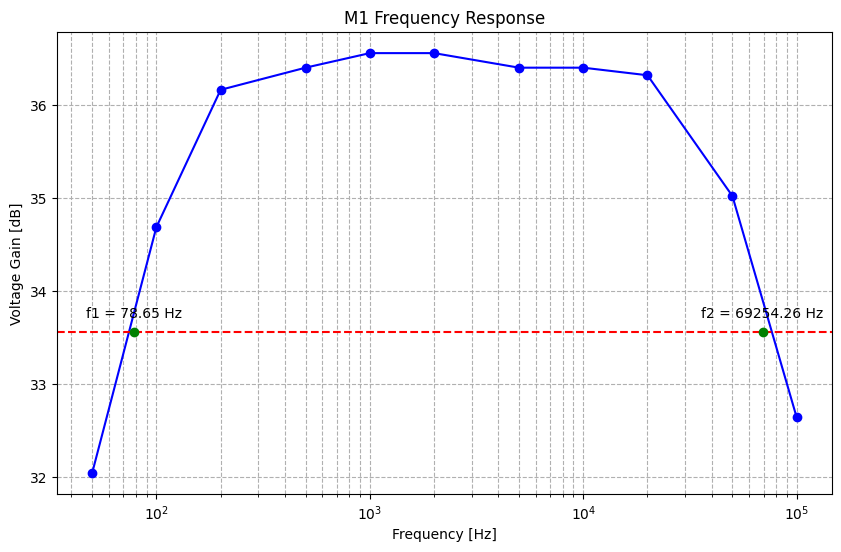

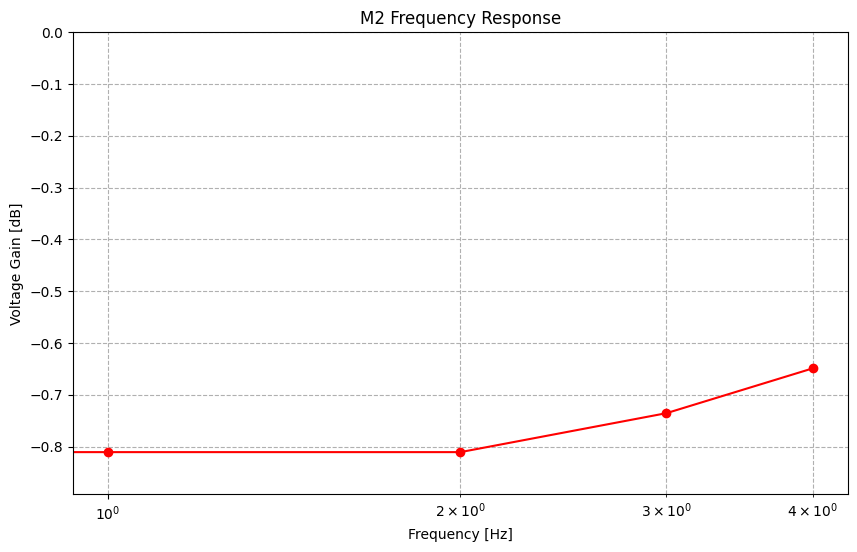

In [6]:


# --- Plot for m1_frequency_response.csv ---
plt.figure(figsize=(10, 6))
plt.plot(df1['f[Hz]'], df1['a_u[dB]'], 'bo-')
plt.xscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Voltage Gain [dB]')
plt.title('M1 Frequency Response')
plt.grid(True, which="both", linestyle='--')

# Find max gain and -3dB level
max_gain = df1['a_u[dB]'].max()
minus_3dB_level = max_gain - 3
plt.axhline(y=minus_3dB_level, color='r', linestyle='--')

# Find intersection points using interpolation
df1 = df1.sort_values(by='f[Hz]')
f = df1['f[Hz]'].values
a = df1['a_u[dB]'].values

indices = np.where(np.diff(np.sign(a - minus_3dB_level)))[0]

intersect_freqs = []
for idx in indices:
    f1, f2 = f[idx], f[idx+1]
    a1, a2 = a[idx], a[idx+1]
    f_intersect = np.interp(minus_3dB_level, sorted([a1, a2]), sorted([f1, f2]))
    intersect_freqs.append(f_intersect)

if len(intersect_freqs) >= 2:
    f_intersect1, f_intersect2 = intersect_freqs[0], intersect_freqs[1]
    plt.plot([f_intersect1, f_intersect2], [minus_3dB_level, minus_3dB_level], 'go')
    plt.annotate(f'f1 = {f_intersect1:.2f} Hz', (f_intersect1, minus_3dB_level), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f'f2 = {f_intersect2:.2f} Hz', (f_intersect2, minus_3dB_level), textcoords="offset points", xytext=(0,10), ha='center')

plt.savefig('m1_frequency_response.png')
plt.show()

# --- Plot for m2_frequency_response.csv ---
plt.figure(figsize=(10, 6))
plt.plot(df2['f[Hz]'], df2['a_u[dB]'], 'ro-')
plt.xscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Voltage Gain [dB]')
plt.title('M2 Frequency Response')
plt.grid(True, which="both", linestyle='--')
min_ylim = df2['a_u[dB]'].min()
plt.ylim(min_ylim*1.1, 0)

plt.savefig('m2_frequency_response.png')
plt.show()

In [7]:
print(f'f1 = {f_intersect1:.2f} Hz')
print(f'f2 = {f_intersect2:.2f} Hz')

f1 = 78.65 Hz
f2 = 69254.26 Hz


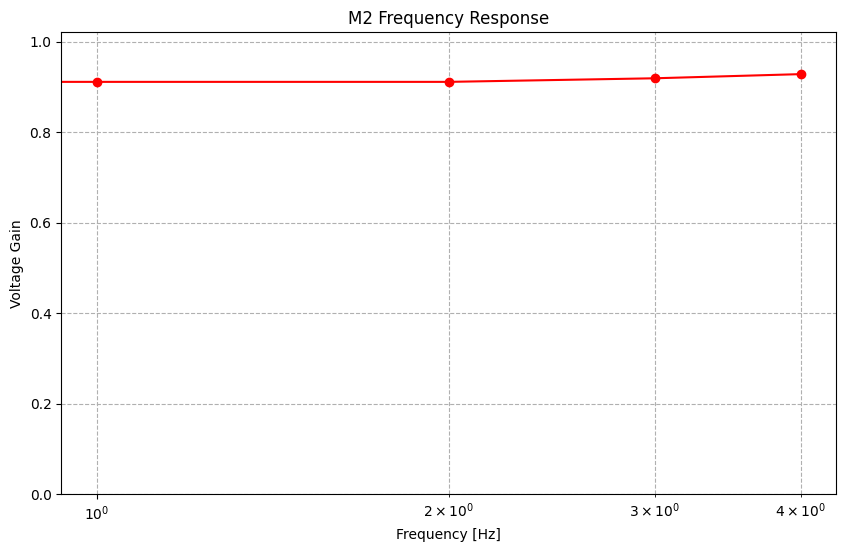

In [14]:
# --- Plot for m2_frequency_response.csv ---
plt.figure(figsize=(10, 6))
plt.plot(df2['f[Hz]'], df2['A_u'], 'ro-')
plt.xscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Voltage Gain')
plt.title('M2 Frequency Response')
plt.grid(True, which="both", linestyle='--')
max_ylim = df2['A_u'].max()
plt.ylim(0,max_ylim*1.1)

plt.savefig('m2_frequency_response_A.png')
plt.show()

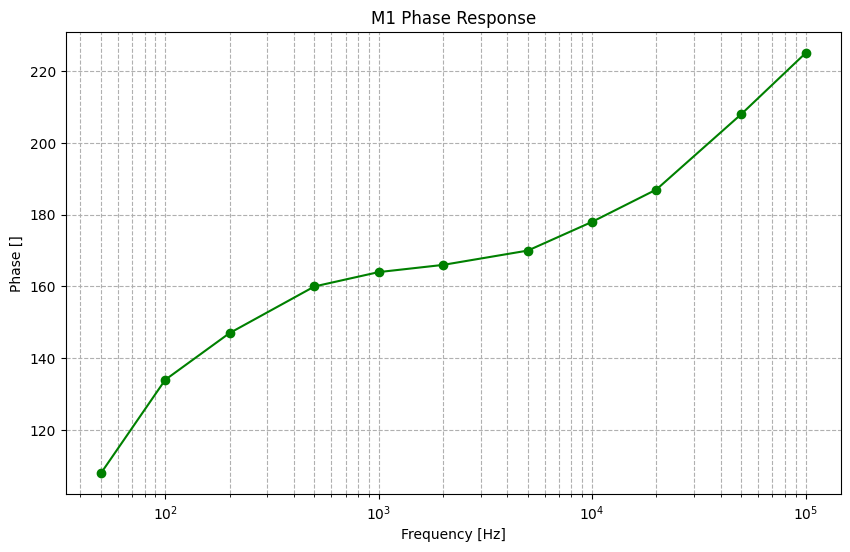

In [5]:
# --- Plot for m1 phase response ---
plt.figure(figsize=(10, 6))
plt.plot(df1['f[Hz]'], df1['phase [°]'], 'go-')
plt.xscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase []')
plt.title('M1 Phase Response')
plt.grid(True, which="both", linestyle='--')
plt.savefig('m1_phase_response.png')
plt.show()

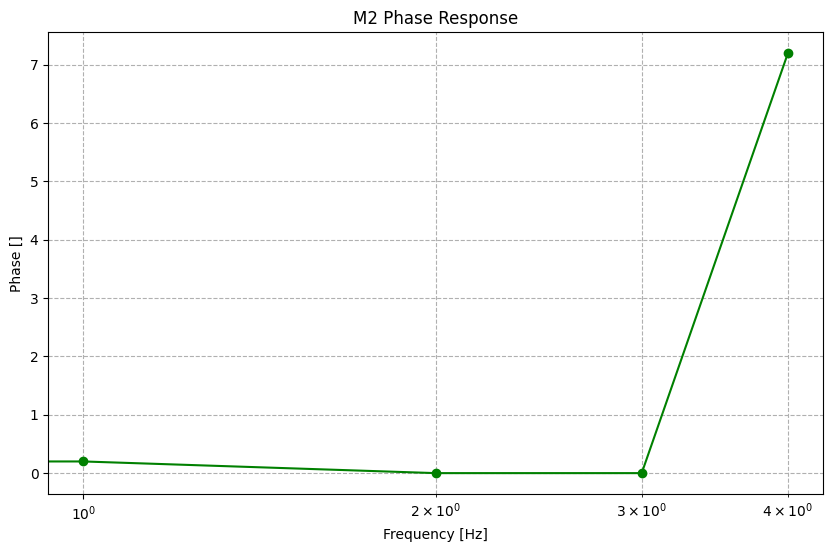

In [11]:
# --- Plot for m1 phase response ---
plt.figure(figsize=(10, 6))
plt.plot(df2['f[Hz]'], df2['phase [°]'], 'go-')
plt.xscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase []')
plt.title('M2 Phase Response')
plt.grid(True, which="both", linestyle='--')
plt.savefig('m2_phase_response.png')
plt.show()